# ACTIVIDAD 2

## GRUPO 2 - Carlos Gonzalez Van Liempt y Álvaro Farreny Boixader

Analisis de bitcoin en función de los sentimientos twitter para intenter predecir una correlación

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">Twitter Web Scraping</h2>

In [ ]:
#pip install tweepy==4.12.0

In [ ]:
"""pip install tweepy==3.10.0
pip install tweepy==4.12.0"""

In [3]:
try:
    import tweepy
except ModuleNotFoundError:
    !pip install tweepy

In [2]:
"pip install TextBlob"

'pip install TextBlob'

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import time
import nltk

## FUNCIONAMIENTO DE LA LIBRERIA TEXTBLOB

In [5]:
# Importar la librería necesaria
from textblob import TextBlob

# Crear un objeto de TextBlob con el texto del tweet
tweet = TextBlob("I love Bitcoin! I'm gonna buy right now")

# Mostrar el resultado del análisis de sentimientos
print(tweet.sentiment)

Sentiment(polarity=0.45535714285714285, subjectivity=0.5678571428571428)


Sentiment(polarity=0.625, subjectivity=0.6) es el resultado que devuelve el método sentiment de la librería TextBlob cuando se le aplica a un texto determinado.

La polaridad es un valor que indica el estado de ánimo o la opinión expresada en un texto, y va de -1 a 1, siendo -1 una opinión muy negativa, 0 una opinión neutral, y 1 una opinión muy positiva. Por otro lado, la subjetividad es un valor que indica el grado de subjetividad o objetividad del texto, y también va de 0 a 1, siendo 0 un texto muy objetivo y 1 un texto muy subjetivo.

## BUSQUEDA DE LOS TWEETS QUE CONTENGAN BITCOIN

In [7]:
df = pd.DataFrame(columns=['Autor', 'Contenido', 'Analisis'])

client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAIV9iAEAAAAABkMM0c9J7Qe1jgFj%2BbtdW4C9vkw%3DSaUUIEGcbOwfPRgWoDKJ6BP6RAJ7wOzpT7SuEskgByo3EWLB3d") # Utilizamos el token Bearer para autentificarnos en twitter

#INFORMACIÓN SOBRE LOS VALORES QUE SE LE PUEDEN DAR A LA QUERY!!
# https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-all

query = "Bitcoin -is:retweet lang:en" # Introducimos con que mensajes queremos que filtre, junto con la condición de que no debe ser un retweet y el idioma debe ser en español
response = client.search_recent_tweets(query=query, max_results=50, tweet_fields=["lang"], expansions=["author_id"]) # realizamos la query con un límite de 20 tweets ( se puede modificar )

users = {u["id"]: u for u in response.includes["users"]} # Relacionamos el id de usuario con el nombre de usuario para crear una lista de usuarios con la que trabajar

for tweet in response.data:  
    if users[tweet.author_id]:
        # Crear un objeto de TextBlob con el texto del tweet
        twt = TextBlob(str(tweet))
        user = users[tweet.author_id]
        df = df.append({'Autor':user.username,'Contenido':str(tweet), 'Analisis':str(twt.sentiment)},ignore_index=True) # Introducimos los valores en el dataframe
#PRINTEAMOS EL DATAFRAME

In [8]:
df

,Autor,Contenido,Analisis
0,usd2btc,"""I'm nearly bankrupt"" – BITCOIN &amp; ETHEREUM...","Sentiment(polarity=0.1, subjectivity=0.4)"
1,Liquid_BTC,Catch the whole deep dive on the #LiquidNetwor...,"Sentiment(polarity=0.1, subjectivity=0.4)"
2,HakimatoSui8869,@Herians93503274 ***** Mineable: mining app **...,"Sentiment(polarity=0.45, subjectivity=0.4375)"
3,ScottAWolfe,@ewarren The majority of the illicit activity ...,"Sentiment(polarity=-0.01874999999999999, subje..."
4,Meme_Coins94,@Bitcoin_tokens_ @DroverToken Buy and hold @Dr...,"Sentiment(polarity=0.0, subjectivity=0.0)"
5,RJStuyvesant,@TerminalSanity1 @erdmncr @cz_binance @jimcram...,"Sentiment(polarity=-0.018749999999999996, subj..."
6,ynsylmz007,"@cz_binance When bitcoin becomes 14k, people s...","Sentiment(polarity=-0.13333333333333333, subje..."
7,santu199022,"This project has a brilliant idea, it's great ...","Sentiment(polarity=0.41, subjectivity=0.65)"
8,SilkoSpots,@mattmilsap @KimDotcom @elonmusk @bisq_network...,"Sentiment(polarity=0.10347222222222223, subjec..."
9,bitcoinpartyall,cnbc: bitcoin drops following fed decision aft...,"Sentiment(polarity=0.125, subjectivity=0.21666..."


### ANALISIS DE LOS SENTIMIENTOS OBTENIDOS ANTERIORMENTE 

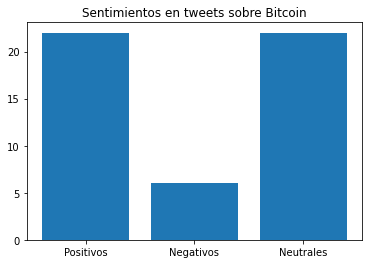

In [9]:
# Inicializar variables para contar la cantidad de tweets por sentimiento
pos_tweets = 0
neg_tweets = 0
neu_tweets = 0

for tweet in response.data:  
    if users[tweet.author_id]:
        analysis = TextBlob(str(tweet))
        # Incrementar la cantidad de tweets con sentimiento positivo, negativo o neutral
        if analysis.sentiment.polarity > 0:
            pos_tweets += 1
        elif analysis.sentiment.polarity < 0:
            neg_tweets += 1
        else:
            neu_tweets += 1

# Crear un gráfico de barras con los resultados obtenidos
plt.bar(["Positivos", "Negativos", "Neutrales"], [pos_tweets, neg_tweets, neu_tweets])
plt.title("Sentimientos en tweets sobre Bitcoin")
plt.show()

OTRA FORMA DE ANALISIS

In [11]:
# Inicializar una lista para almacenar los sentimientos en el tiempo
sentiments = []

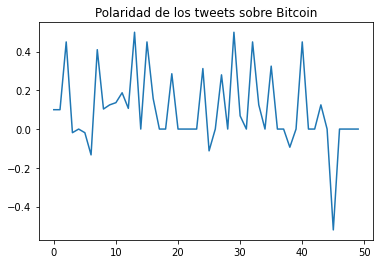

In [12]:
for tweet in response.data:  
    if users[tweet.author_id]:
        analysis = TextBlob(str(tweet))
        # Añadir el sentimiento del tweet a la lista
        sentiments.append(analysis.sentiment.polarity)
        
# Crear un gráfico de líneas con los resultados obtenidos
plt.plot(sentiments)
plt.title("Polaridad de los tweets sobre Bitcoin")
plt.show()

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">CSV Tweet Scraping</h2>

##### Utilizamos Pandas para cargar los datos del archivo .csv que hemos obtenido de kaggle
https://www.kaggle.com/datasets/alaix14/bitcoin-tweets-20160101-to-20190329

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import time
import nltk

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

leemos el csv y lo pasamos a dataframe

In [3]:
df = pd.read_csv('./data/tweetsKaggle.csv',sep=';', nrows=2000000, usecols=['timestamp','user','text'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user       object
 1   timestamp  object
 2   text       object
dtypes: object(3)
memory usage: 45.8+ MB


#### TRATAMIENTO DE DATOS

Tipos de datos
- user
- timestamp
- text
- date
- time

solo nos interesa la Date y el text

In [4]:
df[['Date','Time']] = df.timestamp.str.split(expand=True)
df.head()

,user,timestamp,text,Date,Time
0,KamdemAbdiel,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27,11:49:14+00
1,bitcointe,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27,11:49:18+00
2,3eyedbran,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...,2019-05-27,11:49:06+00
3,DetroitCrypto,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27,11:49:22+00
4,mmursaleen72,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27,11:49:23+00


In [5]:
df=df[['Date','text']]
df.head()

,Date,text
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27,Another Test tweet that wasn't caught in the s...
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [6]:
print(df.isnull().sum())
df = df.dropna()
df.info()

Date    0
text    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   text    object
dtypes: object(2)
memory usage: 45.8+ MB


In [7]:
# convertimos la columna "date" a DatetimeIndex
date_index = pd.to_datetime(df['Date'])
df = df.drop('Date', axis=1)
df['Fecha'] = date_index
df

,text,Fecha
0,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27
1,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27
2,Another Test tweet that wasn't caught in the s...,2019-05-27
3,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27
4,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27
...,...,...
1999995,$391.00 at 13:15 UTC [24h Range: $333.78 - $39...,2015-11-03
1999996,#RDD / #BTC on the exchanges: Cryptsy: Error B...,2015-11-03
1999997,#RDD / #BTC on the exchanges: Cryptsy: Error B...,2015-11-03
1999998,"LIVE: Profit = $3,782.84 (8.44 %). BUY B128.71...",2015-11-03


In [8]:
df.drop_duplicates()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   text    object        
 1   Fecha   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 45.8+ MB


Una vez tenemos los datos procesados en el df, Aplicamos el modelo

## ANALISIS DE SENTIMIENTOS

In [9]:
#acabar de instalar nltk
#nltk.download("vader_lexicon")

In [10]:
analyzer = SentimentIntensityAnalyzer()
sentimientos = []
for texto in df['text']:
    sentiment = analyzer.polarity_scores(texto)
    analisis = sentiment['compound']
    sentimientos.append(analisis)
    
df['sentimientos'] = sentimientos

In [11]:
df.head()

,text,Fecha,sentimientos
0,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27,0.0000
1,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27,-0.1027
2,Another Test tweet that wasn't caught in the s...,2019-05-27,0.0000
3,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27,0.0000
4,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27,0.3612


eliminamos la columna text 

In [12]:
df = df.drop('text', axis=1)
df.head()

,Fecha,sentimientos
0,2019-05-27,0.0000
1,2019-05-27,-0.1027
2,2019-05-27,0.0000
3,2019-05-27,0.0000
4,2019-05-27,0.3612


## Agrupación de df por dia, mes y año

#### Por año

In [13]:
dfanual = df.groupby(pd.Grouper(key='Fecha', freq='1Y')).sum()

In [14]:
print(display(dfanual))

,sentimientos
Fecha,
2009-12-31,0.0000
2010-12-31,0.0000
2011-12-31,3.9768
2012-12-31,592.4937
2013-12-31,17124.7341
2014-12-31,31896.2958
2015-12-31,16369.7524
2016-12-31,53.7069
2017-12-31,114.1558


None


#### Por dia

In [28]:
dfdiario = df.groupby(by="Fecha").sum()

In [29]:
print(display(dfdiario))

,sentimientos
Fecha,
2009-01-11,0.0000
2011-01-09,-0.3400
2011-03-27,0.5413
2011-04-14,-0.4215
2011-04-24,0.0000
...,...
2019-05-26,7592.3654
2019-05-27,4851.7648
2019-05-28,32.9951


None


#### Por mes

In [31]:
dfmes = df.groupby(pd.Grouper(key='Fecha', freq='1M')).sum()

In [25]:
display(dfmes)

,sentimientos
Fecha,
2009-01-31,0.0000
2009-02-28,0.0000
2009-03-31,0.0000
2009-04-30,0.0000
2009-05-31,0.0000
...,...
2019-01-31,108.2542
2019-02-28,139.3034
2019-03-31,453.2642


### GRAFICO DIARIO

In [32]:
dfgrafico = dfdiario.clip(upper=500, lower=-500)

<AxesSubplot: title={'center': 'Diagrama de Lineas'}, xlabel='Fecha', ylabel='Suma de valores'>

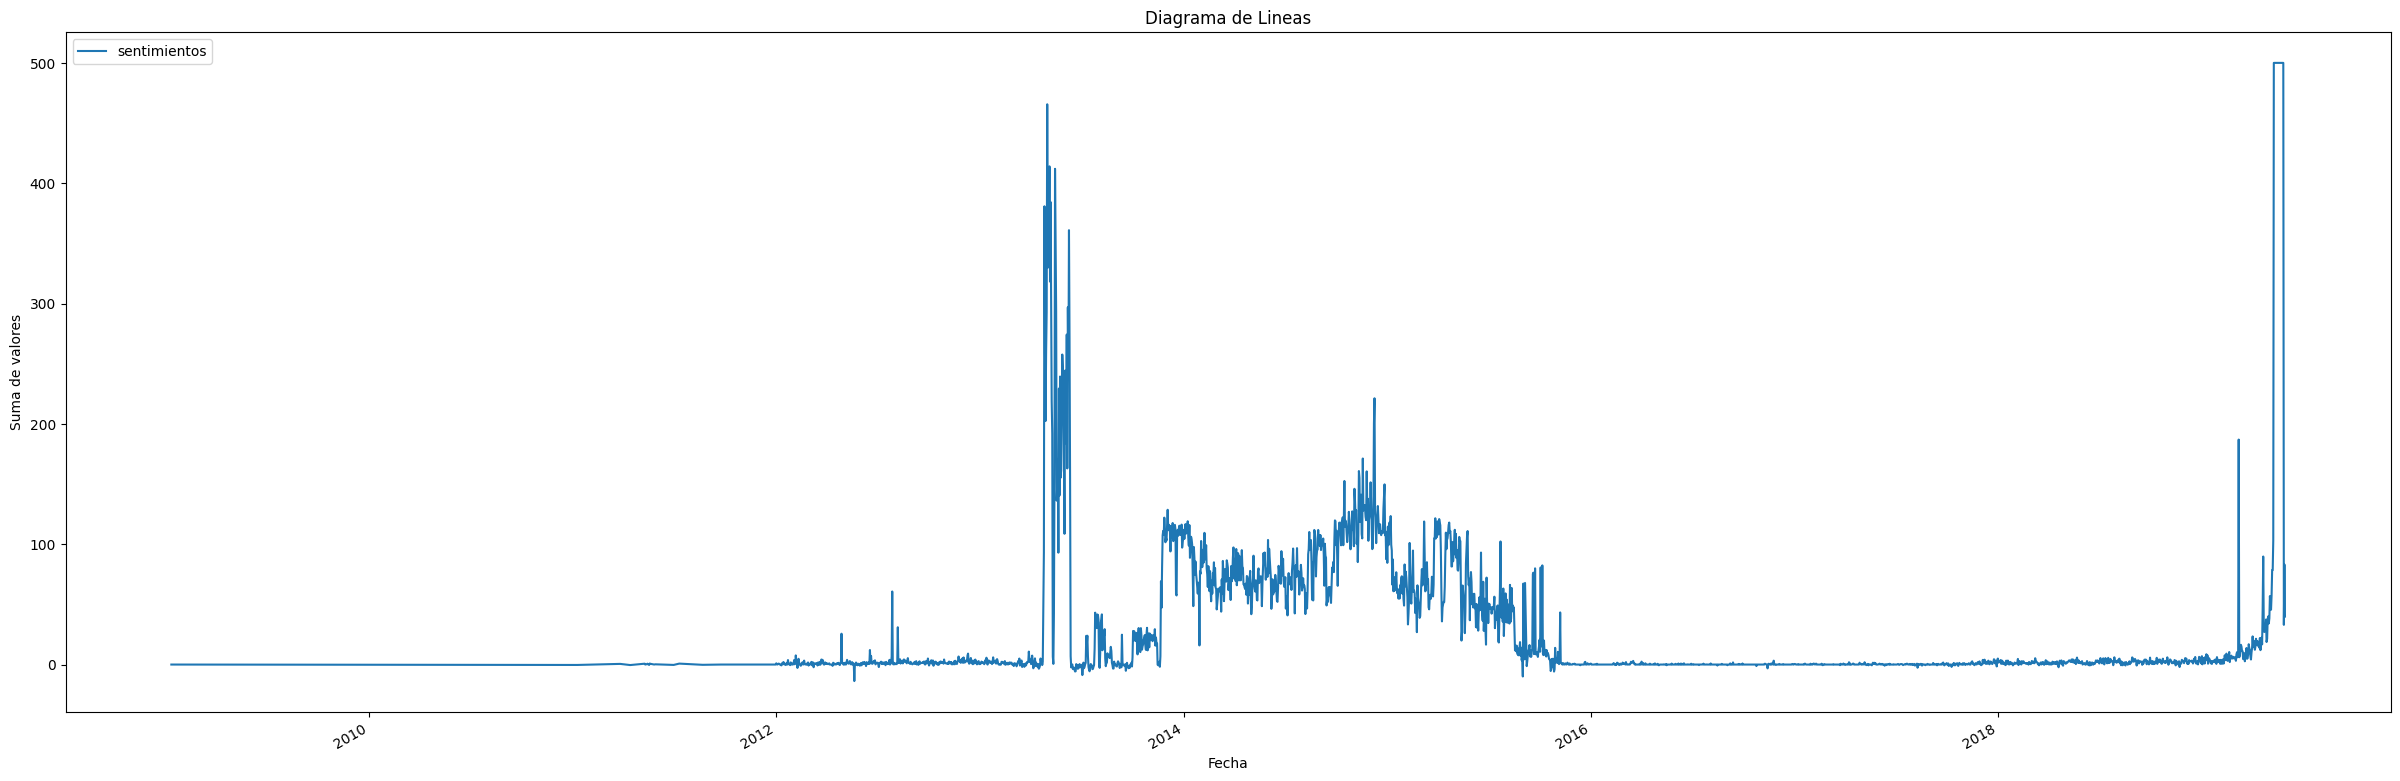

In [26]:
dfgrafico.plot(kind='line', title='Diagrama de Lineas', xlabel='Fecha', ylabel='Suma de valores', figsize=(30,10))

<AxesSubplot:title={'center':'Diagrama de Cajas'}, ylabel='Suma de valores'>

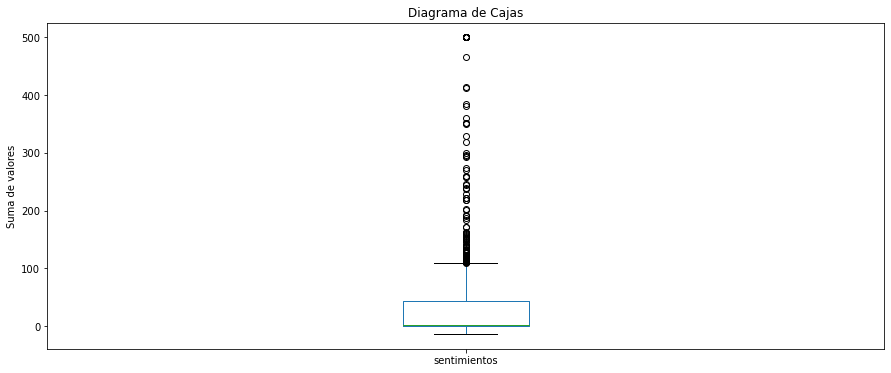

In [34]:
dfgrafico.plot(kind='box', title='Diagrama de Cajas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

#### GRAFICO POR MES

<AxesSubplot: title={'center': 'Diagrama de Lineas'}, xlabel='Fecha', ylabel='Suma de valores'>

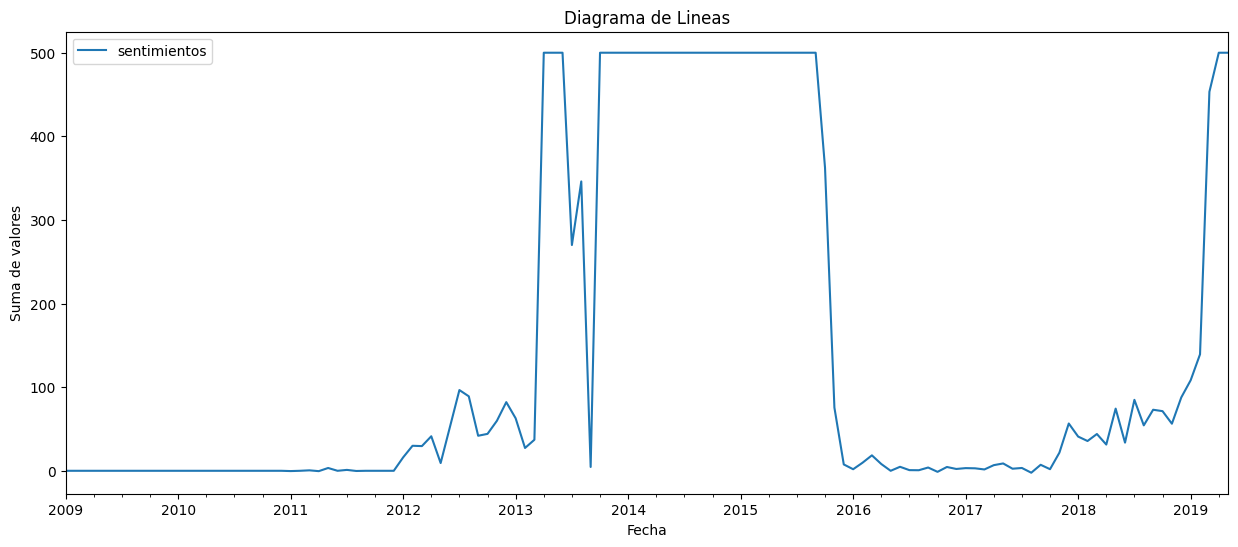

In [29]:
dfgraficomes = dfmes.clip(upper=500, lower=-500)
dfgraficomes.plot(kind='line', title='Diagrama de Lineas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

<AxesSubplot: title={'center': 'Diagrama de Cajas'}, xlabel='Fecha', ylabel='Suma de valores'>

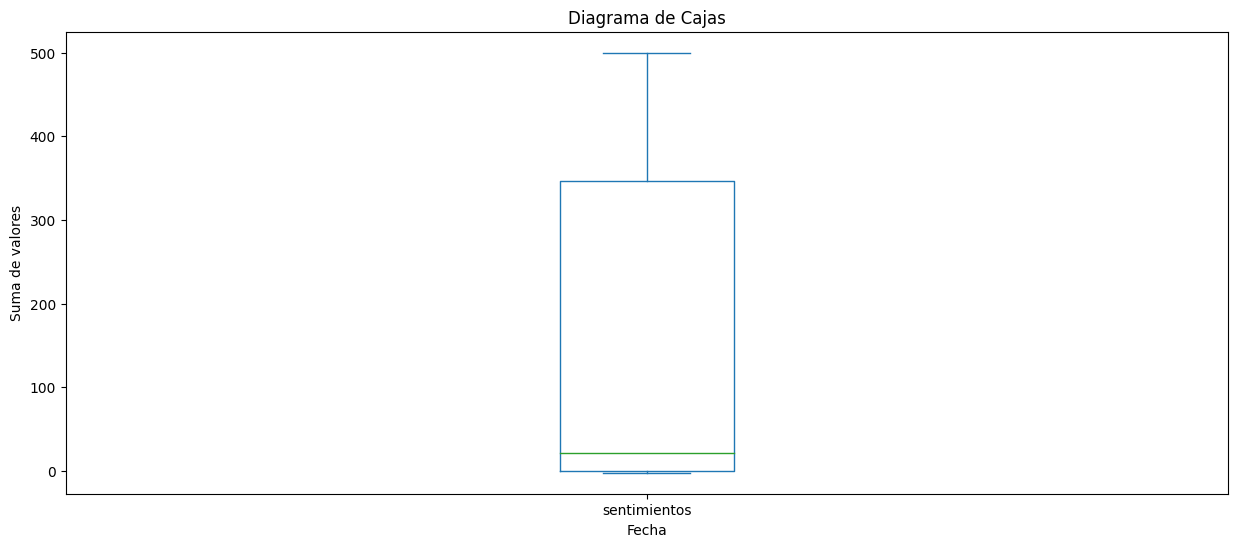

In [30]:
dfgraficomes.plot(kind='box', title='Diagrama de Cajas', xlabel='Fecha', ylabel='Suma de valores', figsize=(15,6))

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">BTC CoinMarketCap Scrapper</h2>

In [39]:
from cryptocmd import CmcScraper
import numpy as np
import datetime
import plotly.graph_objects as go

In [46]:
scraper = CmcScraper('BTC', '28-04-2013', '30-07-2019')

In [47]:
data = scraper.get_dataframe()
data.sort_values(by='Date', ascending=True, inplace=True)

In [48]:
# Preparación de los datos
data['date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[:, ['date', 'Open', 'Close', 'High', 'Low']]
data = data.rename({'Open': 'open', 'Close': 'close', 'High': 'high', 'Low': 'low'}, 
                    axis=1)
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()

In [49]:
btc_halving = {'halving'              : [0, 1 , 2, 3, 4],
               'date'                 : ['2009-01-03', '2012-11-28', 
                                         '2016-07-09', '2020-05-11', np.nan],
               'reward'               : [50, 25, 12.5, 6.25, 3.125],
               'halving_block_number' : [0, 210000, 420000 ,630000, 840000]
              }

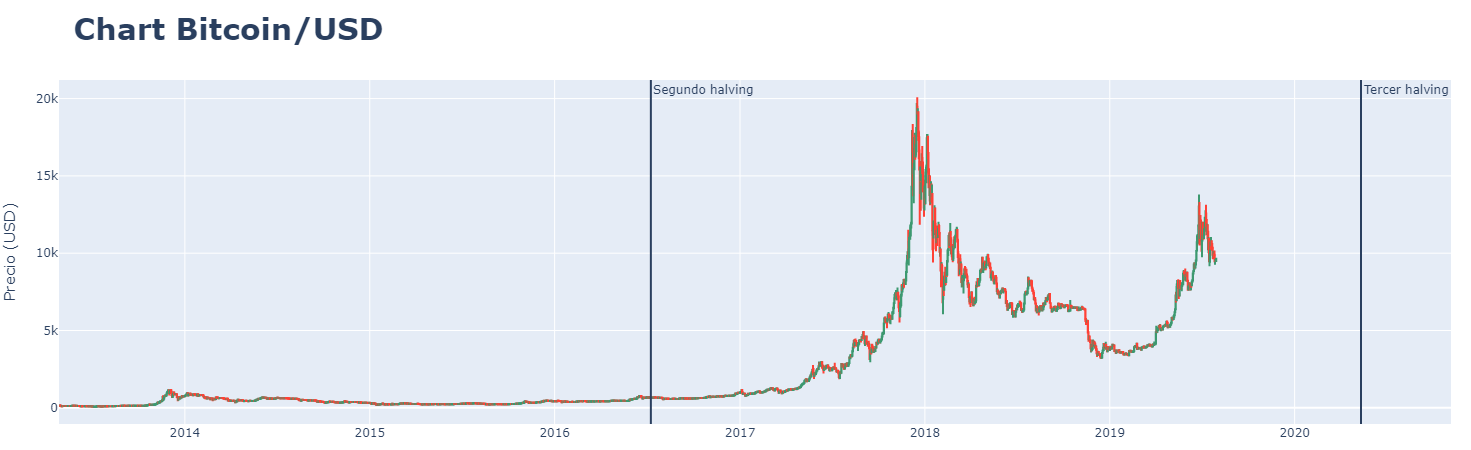

In [50]:
# Gráfico de velas japonesas interactivo con Plotly
candlestick = go.Candlestick(
                    x     = data.index,
                    open  = data.open,
                    close = data.close,
                    low   = data.low,
                    high  = data.high,
                    )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width       = 900,
    height      = 450,
    title       = dict(text='<b>Chart Bitcoin/USD</b>', font=dict(size=30)),
    yaxis_title = dict(text='Precio (USD)', font=dict(size=15)),
    margin      = dict(l=10, r=20, t=80, b=20),
    shapes      = [dict(x0=btc_halving['date'][2], x1=btc_halving['date'][2], 
                        y0=0, y1=1, xref='x', yref='paper', line_width=2),
                   dict(x0=btc_halving['date'][3], x1=btc_halving['date'][3], 
                        y0=0, y1=1, xref='x', yref='paper', line_width=2)
                  ],
    annotations = [dict(x=btc_halving['date'][2], y=1, xref='x', yref='paper',
                      showarrow=False, xanchor='left', text='Segundo halving'),
                   dict(x=btc_halving['date'][3], y=1, xref='x', yref='paper',
                      showarrow=False, xanchor='left', text='Tercer halving')
                  ],
    xaxis_rangeslider_visible = False,
)

fig.show()

<AxesSubplot:title={'center':'Diagrama de Lineas'}, xlabel='Fecha', ylabel='Suma de valores'>

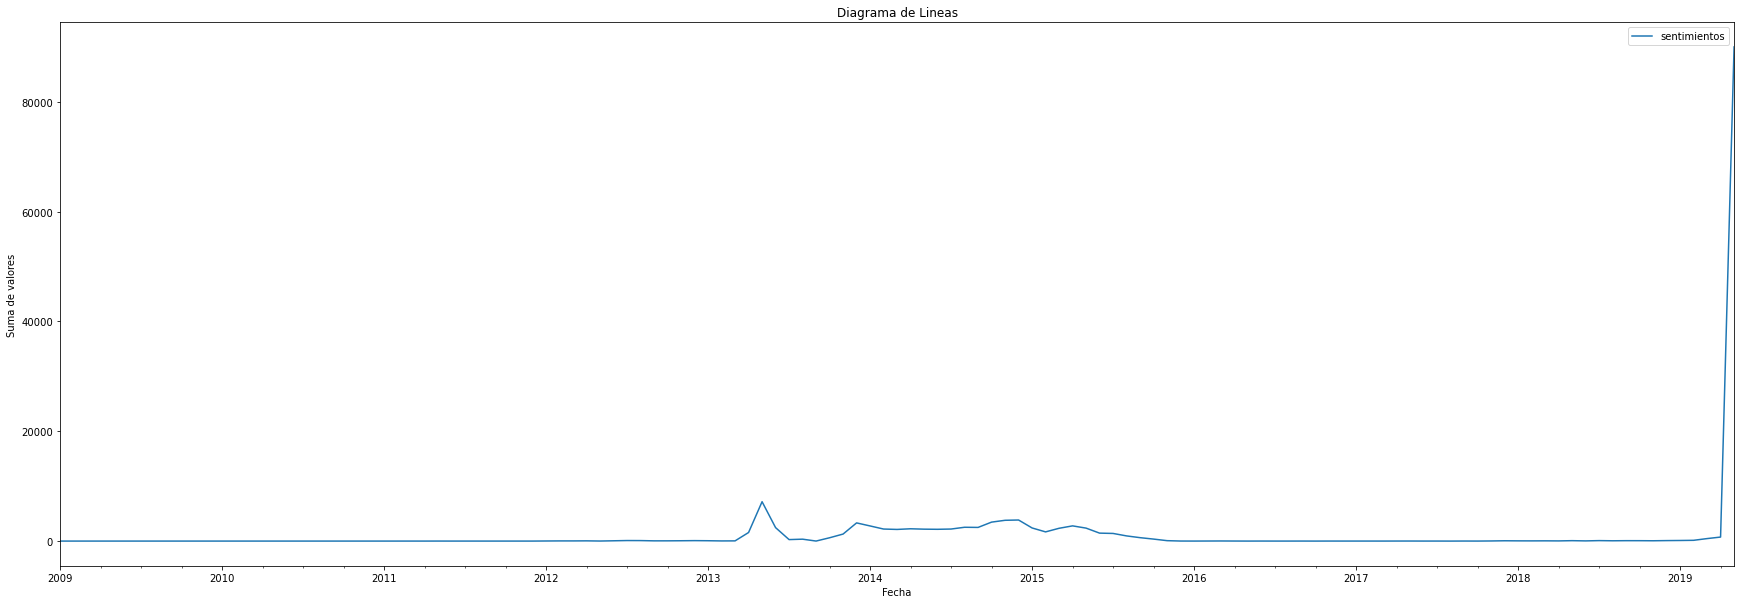

In [ ]:
dfgrafico3 = dfmes.clip(upper=90000, lower=-500)

dfgrafico3.plot(kind='line', title='Diagrama de Lineas', xlabel='Fecha', ylabel='Suma de valores', figsize=(30,10))